#                                        IPL WINNER PREDICTION

### Import all the modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [2]:
matches = pd.read_csv("matches.csv")
most_runs = pd.read_csv("most_runs.csv")

In [3]:
matches.shape

(756, 18)

In [4]:
matches.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
matches.tail()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin
755,11415,IPL-2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong


### Data cleaning

In [6]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [7]:
matches.isnull().sum()

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [8]:
drop_col = matches.isnull().sum()[matches.isnull().sum()>(35/100*matches.shape[0])]
drop_col

umpire3    637
dtype: int64

In [9]:
drop_col.index

Index(['umpire3'], dtype='object')

In [10]:
matches.drop(drop_col.index,axis=1,inplace=True)

In [11]:
matches

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford


In [12]:
matches['city'] = matches['city'].fillna(matches['city'].mode()[0])
matches['winner'] = matches['winner'].fillna(matches['winner'].mode()[0])
matches['player_of_match'] = matches['player_of_match'].fillna(matches['player_of_match'].mode()[0])
matches['umpire1'] = matches['umpire1'].fillna(matches['umpire1'].mode()[0])
matches['umpire2'] = matches['umpire2'].fillna(matches['umpire2'].mode()[0])

In [13]:
matches.isnull().sum()

id                 0
Season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
dtype: int64

In [14]:
matches['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [15]:
matches['team2'].unique()

array(['Royal Challengers Bangalore', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rajasthan Royals', 'Chennai Super Kings', 'Deccan Chargers',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [16]:
matches['team1'] = matches['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
matches['team2'] = matches['team2'].str.replace('Delhi Daredevils','Delhi Capitals')
matches['toss_winner'] = matches['toss_winner'].str.replace('Delhi Daredevils','Delhi Capitals')
matches['winner'] = matches['winner'].str.replace('Delhi Daredevils','Delhi Capitals')

matches['team1'] = matches['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
matches['team2'] = matches['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
matches['toss_winner'] = matches['toss_winner'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
matches['winner'] = matches['winner'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

matches['team1'] = matches['team1'].str.replace('Kings XI Punjab','Punjab Kings')
matches['team2'] = matches['team2'].str.replace('Kings XI Punjab','Punjab Kings')
matches['toss_winner'] = matches['toss_winner'].str.replace('Kings XI Punjab','Punjab Kings')
matches['winner'] = matches['winner'].str.replace('Kings XI Punjab','Punjab Kings')

matches.rename(columns = {'dl_applied':'rain_affected'}, inplace=True)
matches['rain_affected'] = matches['rain_affected'].astype(str)
matches['rain_affected'] = matches['rain_affected'].str.replace('0','no_rain')
matches['rain_affected'] = matches['rain_affected'].str.replace('1','rain')

In [17]:
matches['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Capitals', 'Punjab Kings',
       'Chennai Super Kings', 'Rajasthan Royals', 'Kochi Tuskers Kerala',
       'Pune Warriors', 'Rising Pune Supergiants'], dtype=object)

### Cleaned data

In [18]:
matches

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,rain_affected,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,no_rain,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,no_rain,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,no_rain,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Punjab Kings,Punjab Kings,field,normal,no_rain,Punjab Kings,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,no_rain,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,HDPK Dharmasena,C Shamshuddin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,no_rain,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,no_rain,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,no_rain,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,HDPK Dharmasena,C Shamshuddin
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,no_rain,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford


In [19]:
matches['rain_affected'].value_counts()

no_rain    737
rain        19
Name: rain_affected, dtype: int64

### Feature engineering and data visualization

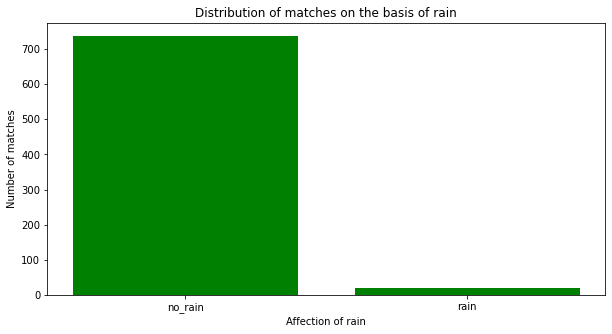

In [20]:
plt.figure(figsize=(10,5))
plt.bar(matches['rain_affected'].value_counts().keys(),matches['rain_affected'].value_counts(),color='green')
plt.title('Distribution of matches on the basis of rain')
plt.xlabel('Affection of rain')
plt.ylabel('Number of matches')
plt.show()

In [21]:
matches_df = matches[matches['rain_affected'] == 'no_rain']

In [22]:
matches_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,rain_affected,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,no_rain,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,no_rain,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,no_rain,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Punjab Kings,Punjab Kings,field,normal,no_rain,Punjab Kings,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,no_rain,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,HDPK Dharmasena,C Shamshuddin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,no_rain,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,no_rain,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,no_rain,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,HDPK Dharmasena,C Shamshuddin
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,no_rain,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford


Text(0.5, 1.0, 'Toss Decision')

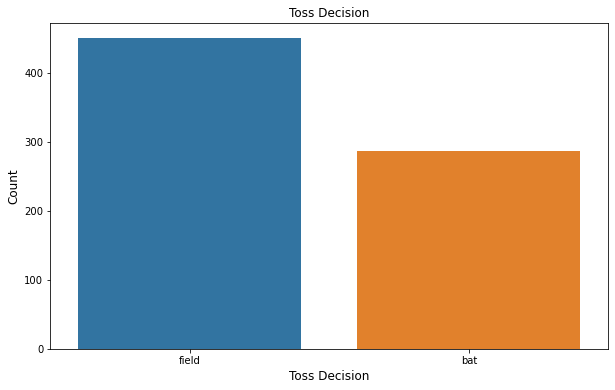

In [23]:
plt.figure(figsize = (10,6))
sns.countplot(x = "toss_decision", data=matches_df)
plt.xlabel('Toss Decision',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Toss Decision')

In [24]:
matches_df['winner'].value_counts()

Mumbai Indians                 113
Chennai Super Kings             98
Kolkata Knight Riders           88
Sunrisers Hyderabad             85
Royal Challengers Bangalore     81
Punjab Kings                    80
Delhi Capitals                  75
Rajasthan Royals                74
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Kochi Tuskers Kerala             5
Rising Pune Supergiants          3
Name: winner, dtype: int64

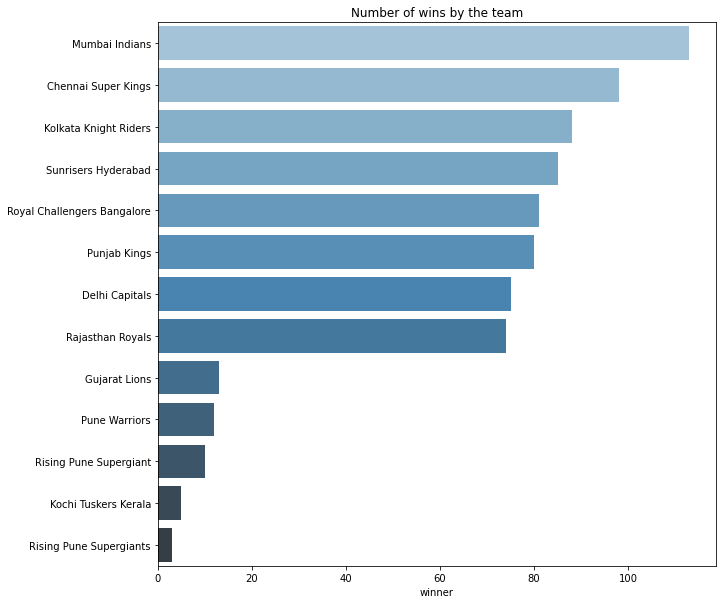

In [25]:
plt.figure(figsize=(10,10))
sns.barplot(x=matches_df['winner'].value_counts(),y=matches_df['winner'].value_counts().keys(),data=matches_df,palette='Blues_d')
plt.title('Number of wins by the team')
plt.show()

In [26]:
matches_df['toss_winner'].value_counts()

Mumbai Indians                 98
Kolkata Knight Riders          88
Sunrisers Hyderabad            87
Delhi Capitals                 87
Chennai Super Kings            87
Royal Challengers Bangalore    80
Punjab Kings                   79
Rajasthan Royals               79
Pune Warriors                  20
Gujarat Lions                  15
Kochi Tuskers Kerala            7
Rising Pune Supergiant          6
Rising Pune Supergiants         4
Name: toss_winner, dtype: int64

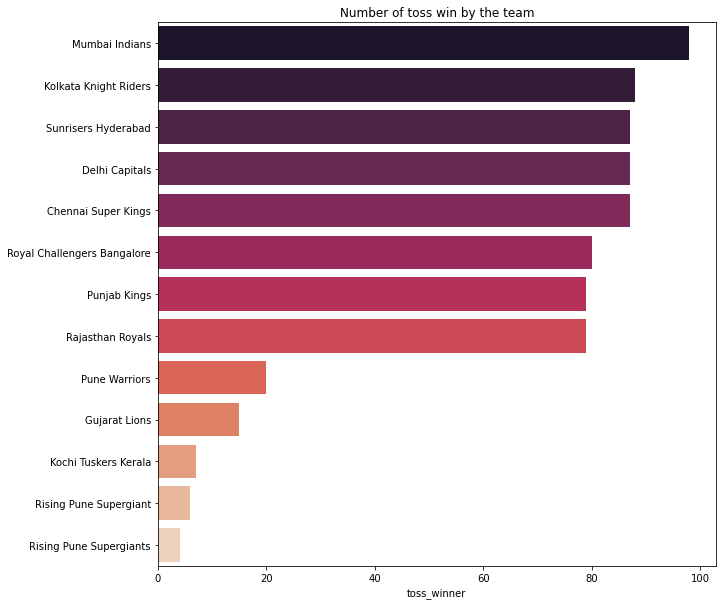

In [27]:
plt.figure(figsize=(10,10))
sns.barplot(x=matches_df['toss_winner'].value_counts(),y=matches_df['toss_winner'].value_counts().keys(),data=matches_df,palette='rocket')
plt.title('Number of toss win by the team')
plt.show()

In [28]:
matches_df['Season'].value_counts()

IPL-2013    76
IPL-2012    74
IPL-2011    70
IPL-2010    60
IPL-2019    60
IPL-2014    59
IPL-2017    58
IPL-2015    57
IPL-2018    57
IPL-2008    56
IPL-2016    56
IPL-2009    54
Name: Season, dtype: int64

In [29]:
win_matches_2019 = matches_df[matches_df['Season'] == 'IPL-2019']

In [30]:
win_matches_2019

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,rain_affected,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
696,11137,IPL-2019,Chennai,23-03-2019,Royal Challengers Bangalore,Chennai Super Kings,Chennai Super Kings,field,normal,no_rain,Chennai Super Kings,0,7,Harbhajan Singh,M. A. Chidambaram Stadium,Bruce Oxenford,Anil Dandekar
697,11138,IPL-2019,Kolkata,24-03-2019,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,no_rain,Kolkata Knight Riders,0,6,AD Russell,Eden Gardens,Chris Gaffaney,Anil Chaudhary
698,11139,IPL-2019,Mumbai,24-03-2019,Delhi Capitals,Mumbai Indians,Mumbai Indians,field,normal,no_rain,Delhi Capitals,37,0,RR Pant,Wankhede Stadium,S Ravi,Yeshwant Barde
699,11140,IPL-2019,Jaipur,25-03-2019,Punjab Kings,Rajasthan Royals,Rajasthan Royals,field,normal,no_rain,Punjab Kings,14,0,CH Gayle,Sawai Mansingh Stadium,C Shamshuddin,KN Anantapadmanabhan
700,11141,IPL-2019,Delhi,26-03-2019,Delhi Capitals,Chennai Super Kings,Delhi Capitals,bat,normal,no_rain,Chennai Super Kings,0,6,SR Watson,Feroz Shah Kotla Ground,Marais Erasmus,Nitin Menon
701,11142,IPL-2019,Kolkata,27-03-2019,Kolkata Knight Riders,Punjab Kings,Punjab Kings,field,normal,no_rain,Kolkata Knight Riders,28,0,AD Russell,Eden Gardens,Anil Chaudhary,Vineet Kulkarni
702,11143,IPL-2019,Bengaluru,28-03-2019,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,no_rain,Mumbai Indians,6,0,JJ Bumrah,M. Chinnaswamy Stadium,S Ravi,O Nandan
703,11144,IPL-2019,Hyderabad,29-03-2019,Rajasthan Royals,Sunrisers Hyderabad,Rajasthan Royals,bat,normal,no_rain,Sunrisers Hyderabad,0,5,Rashid Khan,Rajiv Gandhi Intl. Cricket Stadium,Bruce Oxenford,C Shamshuddin
704,11145,IPL-2019,Mohali,30-03-2019,Mumbai Indians,Punjab Kings,Punjab Kings,field,normal,no_rain,Punjab Kings,0,8,MA Agarwal,IS Bindra Stadium,Vineet Kulkarni,Chris Gaffaney
705,11146,IPL-2019,Delhi,30-03-2019,Kolkata Knight Riders,Delhi Capitals,Delhi Capitals,field,tie,no_rain,Delhi Capitals,0,0,P Shaw,Feroz Shah Kotla Ground,Anil Dandekar,Nitin Menon


In [31]:
win_matches_2019['winner'].value_counts()

Mumbai Indians                 12
Chennai Super Kings            10
Delhi Capitals                 10
Kolkata Knight Riders           6
Punjab Kings                    6
Sunrisers Hyderabad             6
Rajasthan Royals                5
Royal Challengers Bangalore     5
Name: winner, dtype: int64

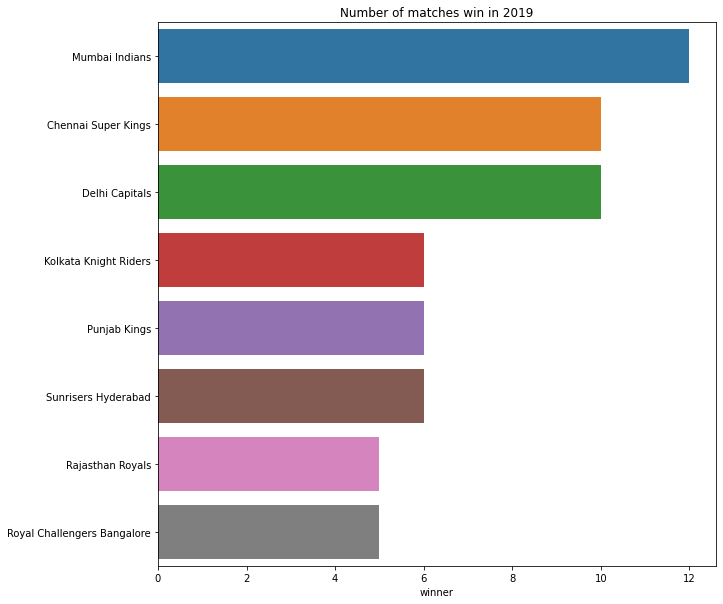

In [32]:
plt.figure(figsize=(10,10))
sns.barplot(x=win_matches_2019['winner'].value_counts(),y=win_matches_2019['winner'].value_counts().keys(),data=win_matches_2019)
plt.title('Number of matches win in 2019')
plt.show()

In [33]:
win_matches_2018 = matches_df[matches_df['Season'] == 'IPL-2018']

In [34]:
win_matches_2018

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,rain_affected,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
636,7894,IPL-2018,Mumbai,07-04-2018,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,no_rain,Chennai Super Kings,0,1,DJ Bravo,Wankhede Stadium,Chris Gaffaney,A Nanda Kishore
637,7895,IPL-2018,Mohali,08-04-2018,Delhi Capitals,Punjab Kings,Punjab Kings,field,normal,no_rain,Punjab Kings,0,6,KL Rahul,"Punjab Cricket Association IS Bindra Stadium, ...",Rod Tucker,K Ananthapadmanabhan
638,7896,IPL-2018,Kolkata,08-04-2018,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,no_rain,Kolkata Knight Riders,0,4,SP Narine,Eden Gardens,C Shamshuddin,A.D Deshmukh
639,7897,IPL-2018,Hyderabad,09-04-2018,Rajasthan Royals,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,no_rain,Sunrisers Hyderabad,0,9,S Dhawan,"Rajiv Gandhi International Stadium, Uppal",Nigel Llong,Vineet Kulkarni
640,7898,IPL-2018,Chennai,10-04-2018,Kolkata Knight Riders,Chennai Super Kings,Chennai Super Kings,field,normal,no_rain,Chennai Super Kings,0,5,SW Billings,"MA Chidambaram Stadium, Chepauk",Anil Chaudhary,Chris Gaffaney
642,7900,IPL-2018,Hyderabad,12-04-2018,Mumbai Indians,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,no_rain,Sunrisers Hyderabad,0,1,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",O Nandan,Nigel Llong
643,7901,IPL-2018,Bengaluru,13-04-2018,Punjab Kings,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,no_rain,Royal Challengers Bangalore,0,4,UT Yadav,M Chinnaswamy Stadium,S Ravi,A.D Deshmukh
644,7902,IPL-2018,Mumbai,14-04-2018,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,normal,no_rain,Delhi Capitals,0,7,JJ Roy,Wankhede Stadium,K Ananthapadmanabhan,Nitin Menon
645,7903,IPL-2018,Kolkata,14-04-2018,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,no_rain,Sunrisers Hyderabad,0,5,B Stanlake,Eden Gardens,A Nanda Kishore,Anil Chaudhary
646,7904,IPL-2018,Bengaluru,15-04-2018,Rajasthan Royals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,no_rain,Rajasthan Royals,19,0,SV Samson,M Chinnaswamy Stadium,C Shamshuddin,S Ravi


In [35]:
win_matches_2018['winner'].value_counts()

Chennai Super Kings            11
Sunrisers Hyderabad            10
Kolkata Knight Riders           9
Royal Challengers Bangalore     6
Rajasthan Royals                6
Mumbai Indians                  6
Punjab Kings                    5
Delhi Capitals                  4
Name: winner, dtype: int64

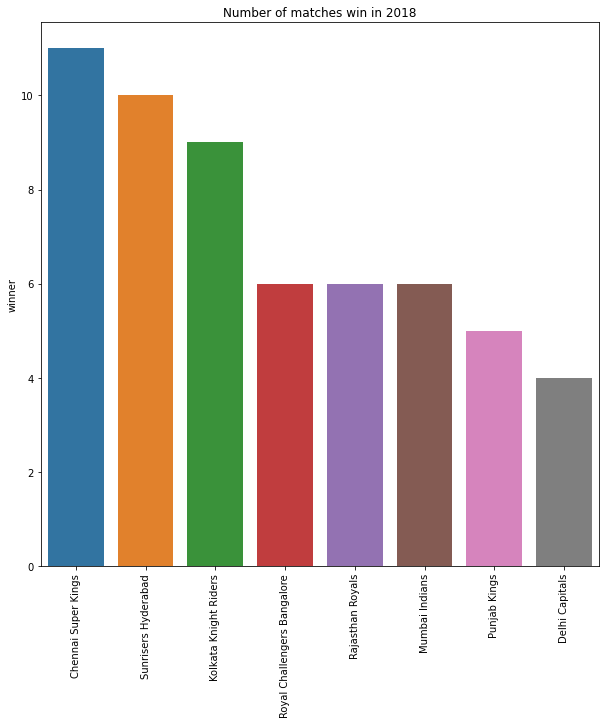

In [36]:
plt.figure(figsize=(10,10))
sns.barplot(x=win_matches_2018['winner'].value_counts().keys(),y=win_matches_2018['winner'].value_counts(),data=win_matches_2018)
plt.xticks(rotation=90)
plt.title('Number of matches win in 2018')
plt.show()

In [37]:
win_matches_2017 = matches_df[matches_df['Season'] == 'IPL-2017']

In [38]:
win_matches_2017

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,rain_affected,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,no_rain,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,no_rain,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,no_rain,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Punjab Kings,Punjab Kings,field,normal,no_rain,Punjab Kings,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,no_rain,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,HDPK Dharmasena,C Shamshuddin
5,6,IPL-2017,Hyderabad,09-04-2017,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,no_rain,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong
6,7,IPL-2017,Mumbai,09-04-2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,no_rain,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan
7,8,IPL-2017,Indore,10-04-2017,Royal Challengers Bangalore,Punjab Kings,Royal Challengers Bangalore,bat,normal,no_rain,Punjab Kings,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
8,9,IPL-2017,Pune,11-04-2017,Delhi Capitals,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,no_rain,Delhi Capitals,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi
9,10,IPL-2017,Mumbai,12-04-2017,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,no_rain,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan


In [39]:
win_matches_2017['winner'].value_counts()

Mumbai Indians                 12
Rising Pune Supergiant         10
Sunrisers Hyderabad             8
Kolkata Knight Riders           8
Punjab Kings                    7
Delhi Capitals                  6
Gujarat Lions                   4
Royal Challengers Bangalore     3
Name: winner, dtype: int64

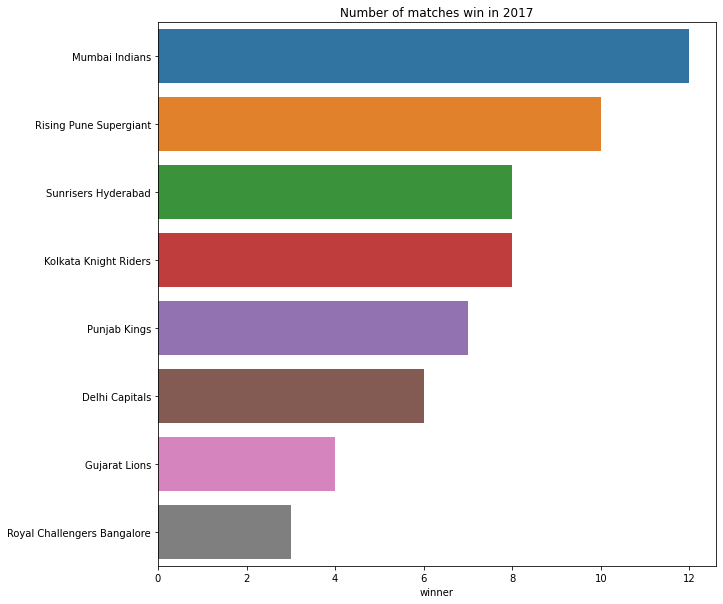

In [40]:
plt.figure(figsize=(10,10))
sns.barplot(x=win_matches_2017['winner'].value_counts(),y=win_matches_2017['winner'].value_counts().keys(),data=win_matches_2017)
plt.title('Number of matches win in 2017')
plt.show()

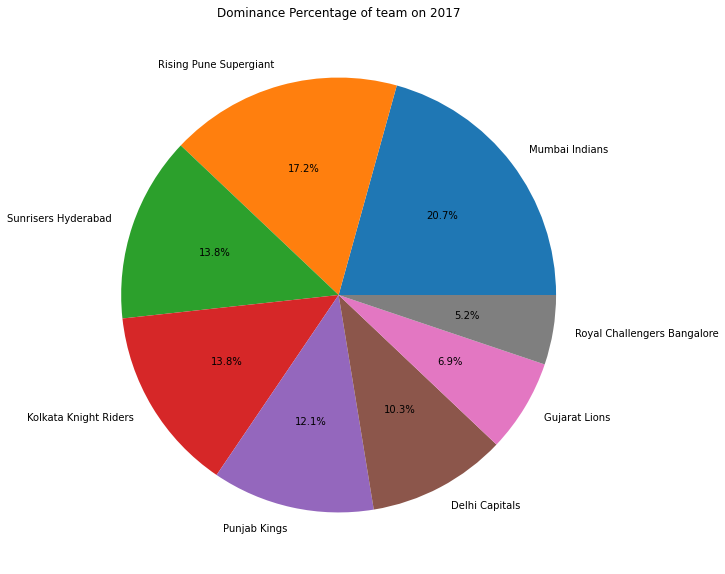

In [41]:
plt.figure(figsize=(10,10))
plt.pie(win_matches_2017['winner'].value_counts(),labels=win_matches_2017['winner'].value_counts().keys(),autopct='%0.1f%%')
plt.title('Dominance Percentage of team on 2017')
plt.show()

In [42]:
matches_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,rain_affected,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,no_rain,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,no_rain,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,no_rain,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Punjab Kings,Punjab Kings,field,normal,no_rain,Punjab Kings,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,no_rain,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,HDPK Dharmasena,C Shamshuddin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,no_rain,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,no_rain,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,no_rain,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,HDPK Dharmasena,C Shamshuddin
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,no_rain,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford


In [43]:
venue_df = matches_df['venue']

In [44]:
venue_df

0      Rajiv Gandhi International Stadium, Uppal
1        Maharashtra Cricket Association Stadium
2         Saurashtra Cricket Association Stadium
3                         Holkar Cricket Stadium
4                          M Chinnaswamy Stadium
                         ...                    
751                             Wankhede Stadium
752                    M. A. Chidambaram Stadium
753                             ACA-VDCA Stadium
754                             ACA-VDCA Stadium
755           Rajiv Gandhi Intl. Cricket Stadium
Name: venue, Length: 737, dtype: object

In [45]:
venue_df = pd.DataFrame(venue_df)

In [46]:
venue_df.columns = ['Stadium_Name']
venue_df

,Stadium_Name
0,"Rajiv Gandhi International Stadium, Uppal"
1,Maharashtra Cricket Association Stadium
2,Saurashtra Cricket Association Stadium
3,Holkar Cricket Stadium
4,M Chinnaswamy Stadium
...,...
751,Wankhede Stadium
752,M. A. Chidambaram Stadium
753,ACA-VDCA Stadium
754,ACA-VDCA Stadium


In [47]:
venue_df['Stadium_Name'].value_counts()

Wankhede Stadium                                        73
Eden Gardens                                            73
M Chinnaswamy Stadium                                   70
Feroz Shah Kotla                                        64
Rajiv Gandhi International Stadium, Uppal               54
MA Chidambaram Stadium, Chepauk                         49
Sawai Mansingh Stadium                                  46
Punjab Cricket Association Stadium, Mohali              35
Maharashtra Cricket Association Stadium                 21
Subrata Roy Sahara Stadium                              17
Dr DY Patil Sports Academy                              17
Punjab Cricket Association IS Bindra Stadium, Mohali    14
Kingsmead                                               14
Sardar Patel Stadium, Motera                            12
SuperSport Park                                         11
Brabourne Stadium                                       11
Saurashtra Cricket Association Stadium                  

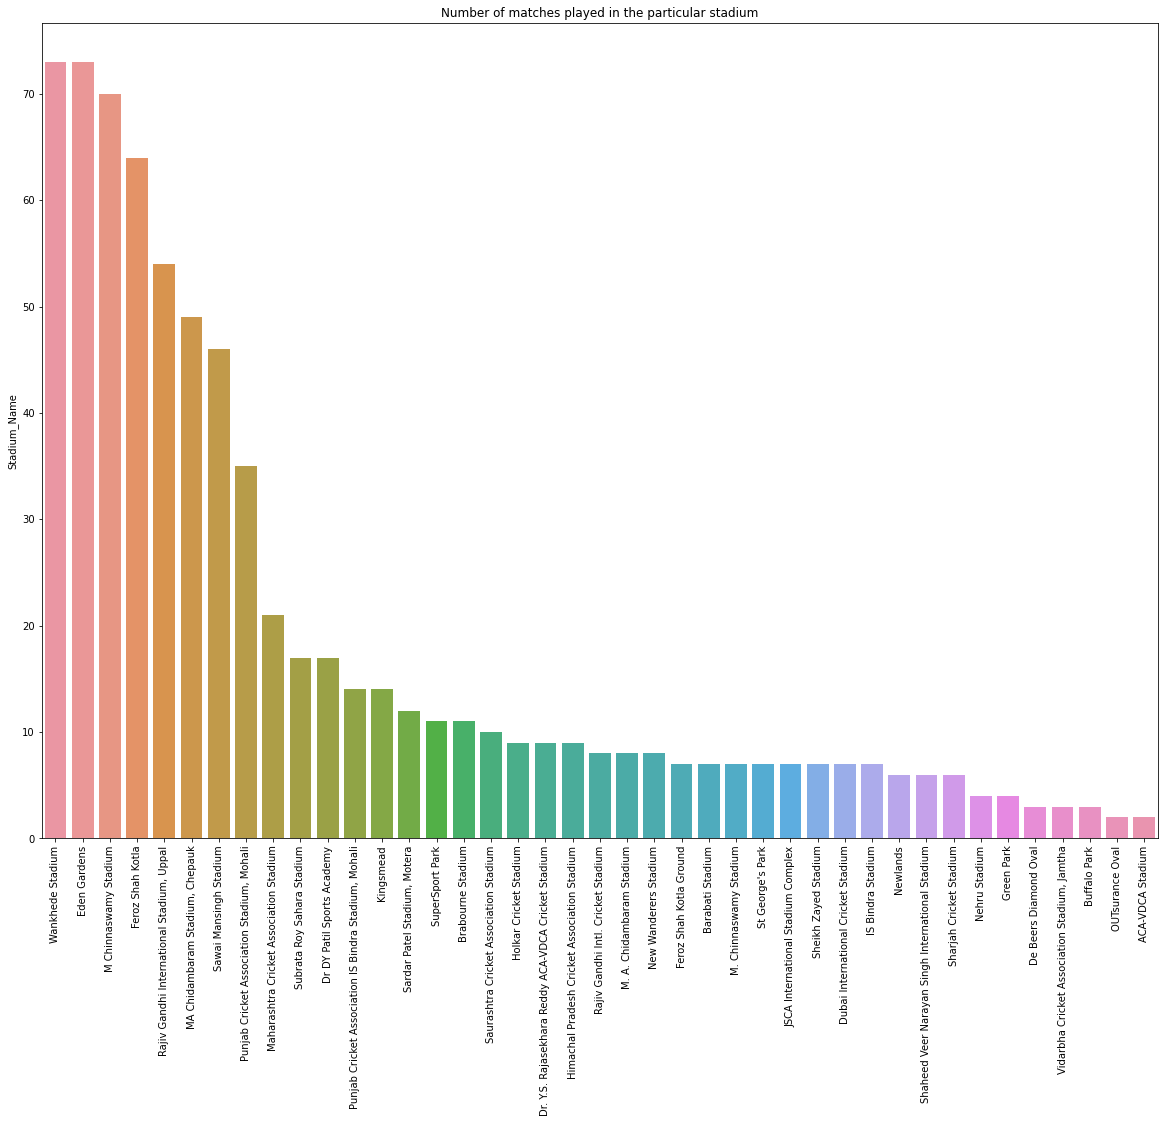

In [48]:
plt.figure(figsize=(20,15))
sns.barplot(x=venue_df['Stadium_Name'].value_counts().keys(),y=venue_df['Stadium_Name'].value_counts(),data=venue_df)
plt.xticks(rotation=90)
plt.title('Number of matches played in the particular stadium')
plt.show()

### Final data to perform Machine Learning

In [49]:
matches_df.drop(["id", "Season","city","date", "player_of_match", 'umpire1', "venue", "umpire2","rain_affected"], axis=1, inplace=True)

In [50]:
matches_df

,team1,team2,toss_winner,toss_decision,result,winner,win_by_runs,win_by_wickets
0,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Sunrisers Hyderabad,35,0
1,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,Rising Pune Supergiant,0,7
2,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,Kolkata Knight Riders,0,10
3,Rising Pune Supergiant,Punjab Kings,Punjab Kings,field,normal,Punjab Kings,0,6
4,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,Royal Challengers Bangalore,15,0
...,...,...,...,...,...,...,...,...
751,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,Mumbai Indians,0,9
752,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,Mumbai Indians,0,6
753,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,Delhi Capitals,0,2
754,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,Chennai Super Kings,0,6


In [51]:
X = matches_df.drop(["winner"], axis=1)
y = matches_df["winner"]

In [52]:
X = pd.get_dummies(X, ["team1","team2", "toss_winner", "toss_decision", "result"], drop_first = True)

### Import Label Encoder and Train Test Split to fit the data

In [53]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [54]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.76)

In [55]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200,min_samples_split=3,
max_features = "auto")

In [56]:
model.fit(x_train, y_train)

RandomForestClassifier(min_samples_split=3, n_estimators=200)

In [57]:
y_pred = model.predict(x_test)

In [58]:
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_pred, y_test)

### Model build with the accuracy score 

In [59]:
ac

0.9265536723163842

In [60]:
Accuracy = ac*100

In [61]:
print("The accuracy of the model is: ",Accuracy)

The accuracy of the model is:  92.65536723163842
